In [114]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import LocalOutlierFactor

#### We can fetch the dataset using sklearnm

In [115]:
# Now, fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version= 1)

#### Dataset already have structure including X attributes, y target, DESCR description of dataset

In [116]:
X, y = mnist['data'], mnist['target']


In [117]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
y.shape

(70000,)

In [119]:
X.shape

(70000, 784)

#### There are 70 000 images and each image with 784 features

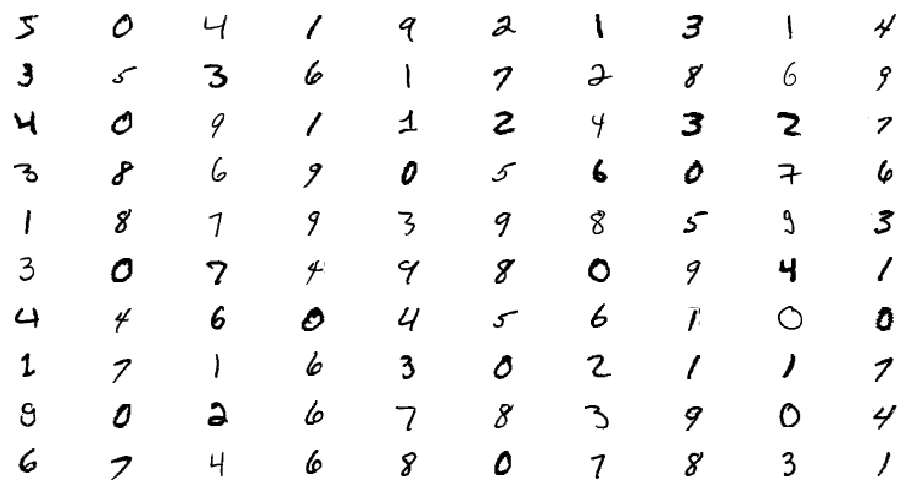

In [120]:
# a few 100 digit from MNIST dataset
fig, axes = plt.subplots(10, 10, figsize= (10, 5))
store = []

for cnt, path in enumerate(X.iloc[:100].values):
    image = path
    image_reshaped = image.reshape(28, 28)
    store.append(image_reshaped)
    
    ax = axes[cnt // 10, cnt % 10]
    ax.imshow(image_reshaped, cmap= mpl.cm.binary, interpolation= 'nearest')
    ax.axis('off')

plt.tight_layout() 
plt.show()   

In [143]:
# each image with 28 x 28 pixes. we need to reshape any instance's feature vector
some_digit = X.iloc[1].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

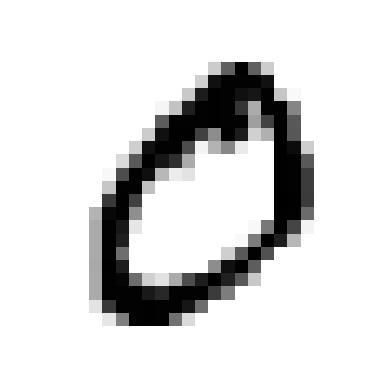

In [144]:
# display image
plt.imshow(some_digit_image, cmap= mpl.cm.binary, interpolation= 'nearest')
plt.axis('off')

plt.show()

#### Digit look like 5, we can use target y to check if its realy 5

In [123]:
print(y[0])

5


#### Indeed it is 5

#####

In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [125]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [126]:
# NaN 
X.isna().mean()

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64

In [127]:
y.isna().sum()

np.int64(0)

In [128]:
X.isna().sum().sum()

np.int64(0)

#### We can now create a train and test sets

In [129]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### We can create a new target y for classification picking digit 5 

In [135]:
## choose a model
sgd_model = SGDClassifier(random_state= 42)

try:
    sgd_model.fit(X_train, y_train)
    print('The model trained successfully')

except Exception as e:
    print(f'The model failed to train: {e}')    

The model trained successfully


In [164]:
# test our model
store = []
for i in range(len(X_test)):
    pred = sgd_model.predict(X.iloc[[i]])
    store.append(pred)

In [169]:
store[1]

array(['0'], dtype='<U1')

#### The model is doing well but not perfect, is failing to correctly predict all the digits. We can check its perfomance by measuring the score and accuracy

In [ ]:
   # 